#Вариант 14
Кривенцова Л.С. 0382

Необходимые библиотеки.

In [13]:
install.packages("e1071", dep = TRUE, type = "source")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘mlbench’, ‘randomForest’, ‘SparseM’, ‘xtable’, ‘slam’




###1. Исходные данные:<br>
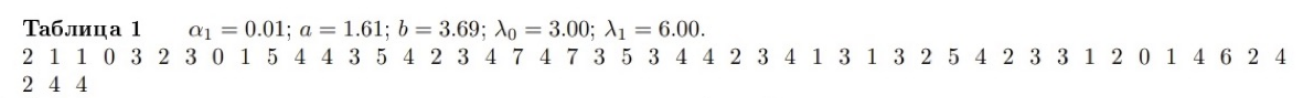


Преобразуем данные эксперимента в вектор.

In [4]:
experiment <- c(2,1,1,0,3,2,3,0,1,5,4,4,3,5,4,2,3,4,7,4,7,3,5,3,4,4,2,3,4,1,3,1,3,2,5,4,2,3,3,1,2,0,1,4,6,2,4,2,4,4)
experiment

[1] 2 1 1 0 3 2 3 0 1 5 4 4 3 5 4 2 3 4 7 4 7 3 5 3 4 4 2 3 4 1 3 1 3 2 5 4 2 3
[39] 3 1 2 0 1 4 6 2 4 2 4 4

####a) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот

*Вариационный ряд* - набор порядковых статистик.<br>
Для этого отсортируем данные эксперимента *experiment*.<br><br>

In [ ]:
experiment <- sort(experiment)
experiment

[1] 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
[39] 4 4 4 4 4 5 5 5 5 6 7 7


*Эмпирическая функция распределения*.
Воспользуемся функцей $ecdf$ для вычисления выборочной функции распределения, которую отрисуем с помощью функцией $plot$.<br>Формула:<br>
$\displaystyle F_n(x) = \frac {1} {n} \sum_{i=1}^n
\mathbb{1}_{\{x_i < x\}} = \frac {1} {n} \sum_{i=1}^n \mathbb{1}_{\{x_{(i)} < x\}},
\mathbb{1}_{A} =
\begin{cases}
    1  & \text{, если A выполнено}\\
    0  & \text{, иначе}
\end{cases}$<br><br>
Найдем значение выборочной функции распределения ($n = 50$)<br>
$F_n(x) = 
\begin{cases}
    0,  & x \le 0\\
    \frac {3} {50},   & x \in (0,1]\\
    \frac {10} {50}, & x \in (1,2]\\
    \frac {19} {50}, & x \in (2,3]\\
    \frac {30} {50}, & x \in (3,4]\\
    \frac {43} {50}, & x \in (4,5]\\
    \frac {47} {50}, & x \in (5,6]\\
    \frac {48} {50}, & x \in (6,7]\\
    1, & x > 7
\end{cases}$ <br>

[1] 3

[1] 7

[1] 9

[1] 11

[1] 13

[1] 4

[1] 1

[1] 2

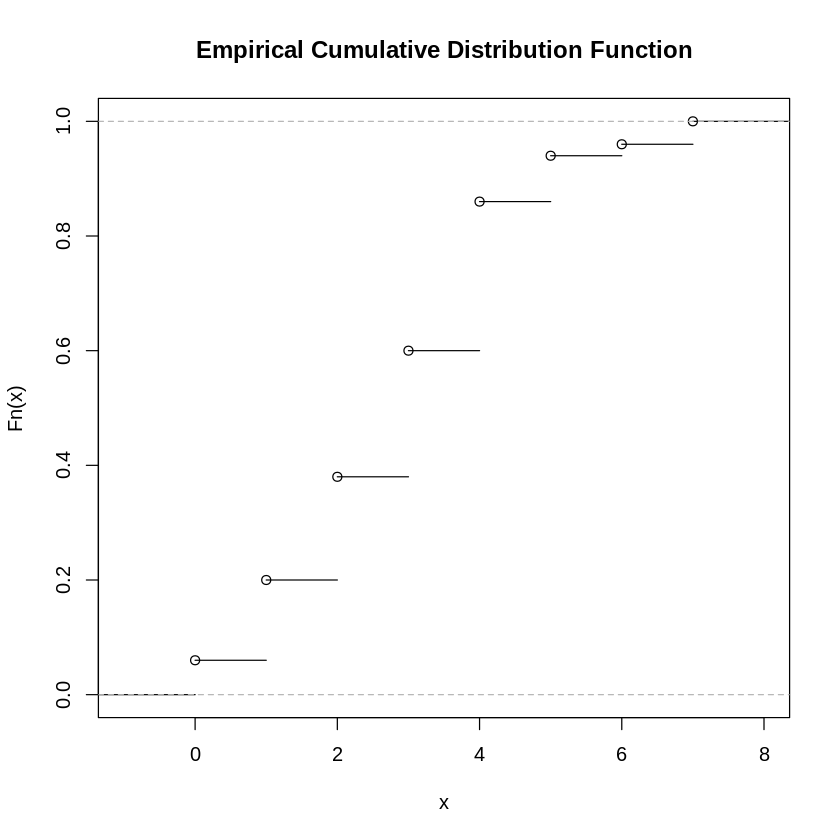

In [ ]:
sum(experiment == 0)
sum(experiment == 1)
sum(experiment == 2)
sum(experiment == 3)
sum(experiment == 4)
sum(experiment == 5)
sum(experiment == 6)
sum(experiment == 7)
ECDF <- ecdf(experiment)
plot(ECDF, pch=1, main = "Empirical Cumulative Distribution Function")


*Частота* - отношение количества элементов в вариационном ряду равных заданному значению или принадлежащих заданному промежутку значений к общему количеству:<br>
$freq = \frac 1 n \sum_{i=1}^n \mathbb{1}_{\{x_{(i)} = x\}}\ или\ freq = \frac 1 n \sum_{i=1}^n \mathbb{1}_{\{x_{(i)} \in [a,b]\}}$ <br><br>
Найдем частоты значений в вариационном ряду (с помощью кода из предыдущего шага):<br>
$\begin{array}{|c|c|} \hline
X_i & freq\\ \hline
0 & 3\\
1 & 7\\
2 & 9\\
3 & 11\\
4 & 13\\
5 & 4\\
6 & 1\\
7 & 2\\ \hline
\end{array}$

С помощью функции $hist$ выведем гистограмму частот.


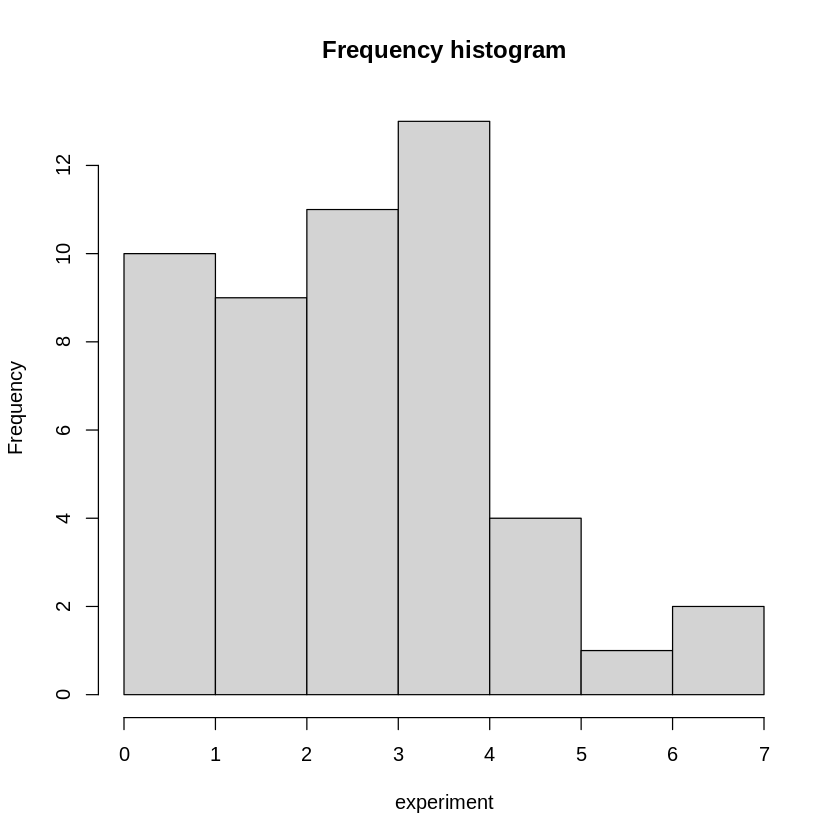

In [ ]:
hist(experiment, main = "Frequency histogram")

####b) Вычислить выборочные аналоги следующих числовых характеристик:

#####(i) Математическое ожидание.

*Выборочное среднее*: $\overline {X} = \frac {1} {n} \sum_{i=1}^n X_i = 3$<br>
Данные, полученные через формулу и с помощью встроенной функции $mean$ совпадают.

In [7]:
sample_mean <- (0*3 + 1 * 7 + 2 * 9 + 3 * 11 + 4 * 13 + 5 * 4 + 6 * 1 + 7 * 2)/50
sample_mean_pr <- mean(experiment)
sample_mean
sample_mean_pr

[1] 3

[1] 3

#####(ii) Дисперсия.

*Посчитаем выборочный центральный момент*: $S^2 = \frac {1} {n} \sum_{i=1}^n (X_i - \overline X)^2 = 2.68$ <br>
Данные, полученные напрямую и через формулу совпадают.

In [ ]:
dispersion = (((0 - 3)^2)*3 + (1 - 3)^2 * 7 + (2 - 3)^2 * 9 + (3 - 3)^2 * 11 
+ (4 - 3)^2 * 13 + (5 - 3)^2 * 4 + (6 - 3)^2 * 1 + (7 - 3)^2 * 2)/50
dispersion_pr <- sum((experiment - sample_mean_pr)^2)/50
dispersion
dispersion_pr

[1] 2.68

[1] 2.68

#####(iii) Медиана.

*Выборочная квантиль порядка $p$*:
$Z_p = 
\begin{cases}
    X_{(np)}  & np \in \mathbb{Z} \\
    X_{([np]+1)} & np \notin \mathbb{Z}
\end{cases}$<br>
*Выборочная медиана* - квантиль порядка $\frac 1 2$.<br><br>
Для подсчёта была использована функция $median$.

In [ ]:
median <- median(experiment)
median

[1] 3

#####(iv) Асимметрия.

*Асимметрия*: $\displaystyle asymmetry = \frac {\mu_{3,n}} {\mu_{2,n}^{\frac 3 2}}$, где $\mu_{k,n}$ - $k$-ый (второй и третий) выборочные центральные моменты.<br>

Данные, полученные при подсчёте напрямую (по формуле) и через функцию $skewness$ совпадают с некоторой погрешностью.

In [ ]:
library(e1071)
mu.2 <- dispersion_pr
mu.3 <- sum((experiment - sample_mean_pr)^3)/50
asymmetry <- mu.3/(mu.2*sqrt(mu.2))
asymmetry_pr <- skewness(experiment)
asymmetry
asymmetry_pr

[1] 0.2461623

[1] 0.2388145

#####(v) Эксцесса.

*Эксцесса*: $\displaystyle excess\ kurtosis = \frac {\mu_{4,n}} {\mu_{2,n}^2} - 3$, где $\mu_{k,n}$ - $k$-ый (второй и четвёртый) выборочные центральные моменты.<br>
Данные, полученные при подсчёте напрямую (по формуле) и через функцию  $kurtosis$  совпадают с некоторой погрешностью.

In [ ]:
mu.4 <- sum((experiment - sample_mean_pr)^4)/50
excess <- mu.4 / (mu.2)^2 - 3
excess_pr <- kurtosis(experiment)
excess
excess_pr

[1] -0.1207396

[1] -0.2347583

#####(vi) Вероятности $Pr(X \in [a,b]) = Pr(X \in [1.61,3.69])$.

$\displaystyle Pr(X \in [a,b]) = \sum_{i=a}^b Pr(X=i)$<br>
$\displaystyle Pr(x=i) = \frac 1 n \sum_{j=1}^n \mathbb{1}_{\{X_j = i\}}$.<br>
Значение вероятности было вычислено по соответсвующим формулам.

In [ ]:
p.0 <- sum(experiment == 2)/50
p.1 <- sum(experiment == 3)/50
P <- p.0 + p.1
P

[1] 0.4

#### c) В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия (ОМП) параметра $\lambda$, а также оценку $\lambda$ по методу моментов (ОММ). Найти смещение оценок.

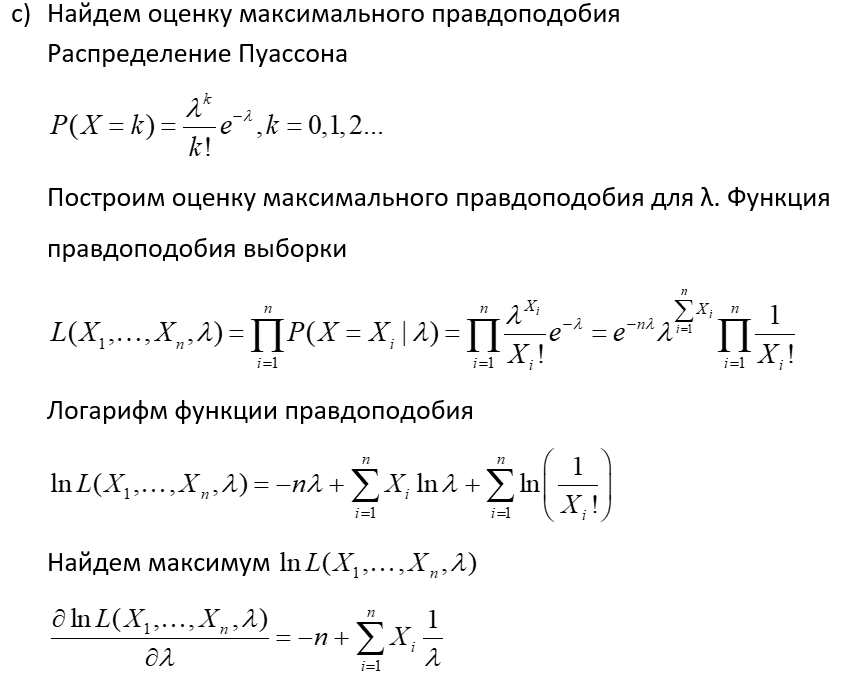

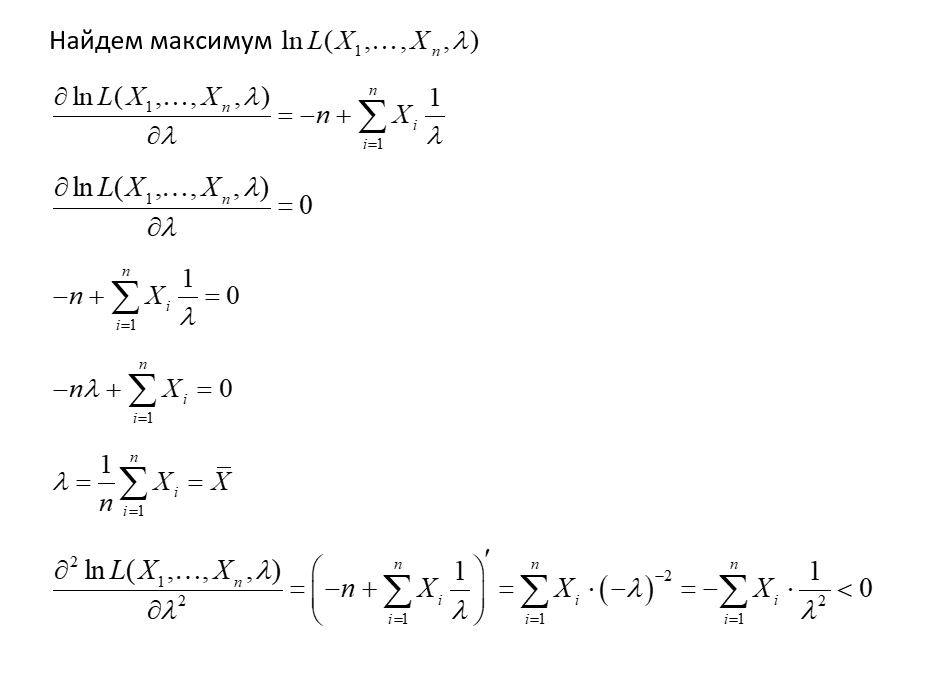
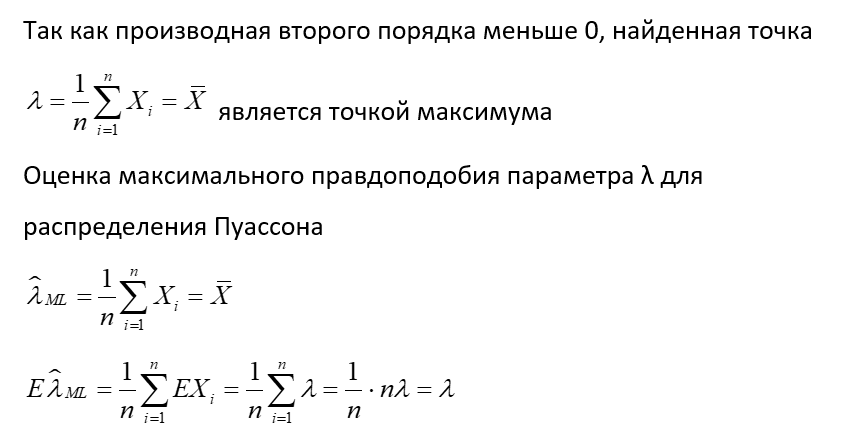
Так как полученная оценка несмещенная, смещение равно 0.
Построим оценку по методу моментов. Для этого приравняем выборочный момент первого порядка, т.е. выборочное среднее к математическому ожиданию для распределения Пуассона, т.е. к  λ. Оценка совпала с оценкой максимального правдоподобия, поэтому она также несмещенная.<br>
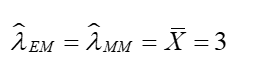


#### d) Построить ассимптотический доверительный интервал уровня значимости $\alpha_1 = 0.01$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

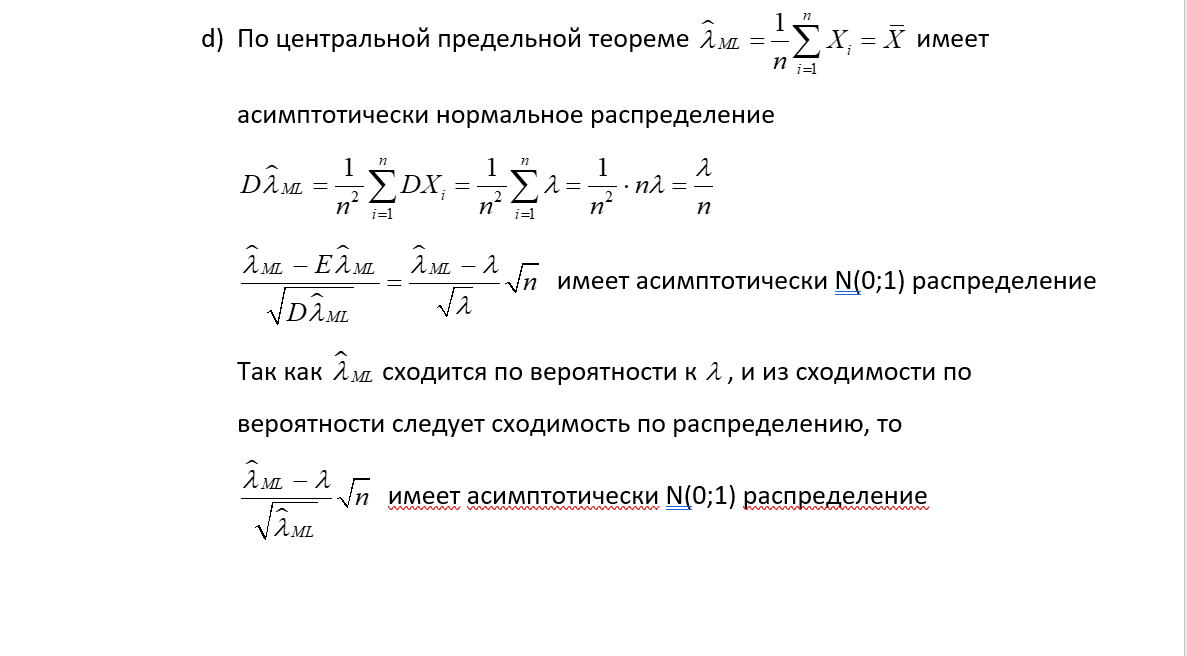
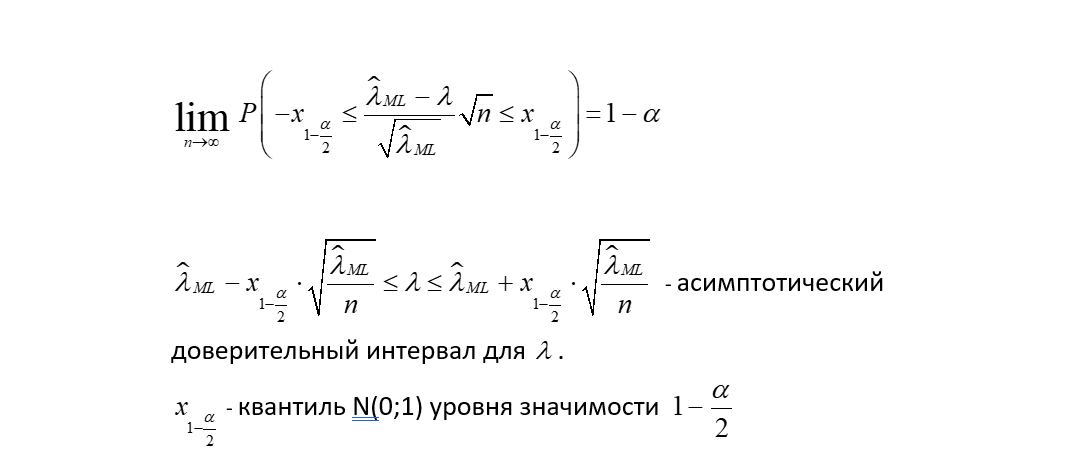
<br>
Асимптотический доверительный интервал для λ
α1	= 0,01				<br>
Квантиль N(0;1)	2,575829			


e) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с праметром $\lambda_0 (3.00)$. Проверить гипотезу на уровне значимости $\alpha_1 (0.01)$. Вычислить наибольшее значение уроня значимости, на котором еще нет оснований отвергнуть данную гипотезу. 

Статистика критерия
$\chi^2 = \displaystyle\sum_{i=1}^{r} \frac{(\mu_i - np_{oi})^2}{np_{oi}}$

$p_{oi} = P_0(I_i) = F_0(a_i)-F_0(a_{i-1})$

$H_0: F \equiv Pois(\lambda_0)$

$H_A: F \not\equiv Pois(\lambda_0)$

  Вывод: нулевая гипотеза верна.

 [1] 2 1 1 0 3 2 3 0 1 5 4 4 3 5 4 2 3 4 7 4 7 3 5 3 4 4 2 3 4 1 3 1 3 2 5 4 2 3
[39] 3 1 2 0 1 4 6 2 4 2 4 4
X.2 =  3.296703 , X.alpha =  13.2767

[1] TRUE

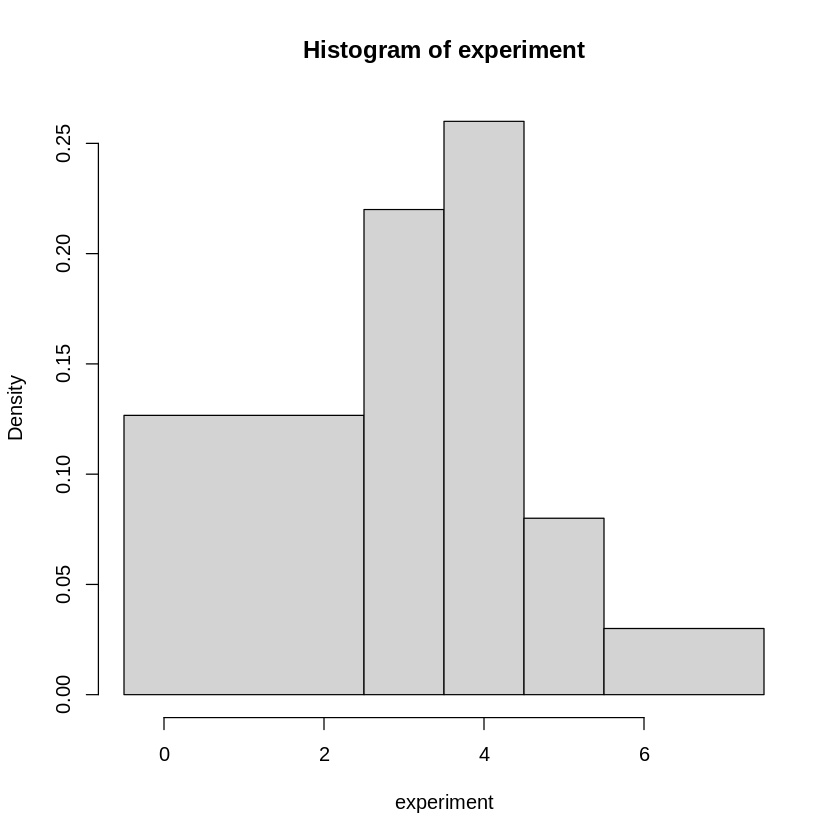

In [5]:
print(experiment)
n <- length(experiment)
h <- hist(experiment,  c(-0.5, 2.5, 3.5, 4.5, 5.5, 7.5))
nu <- h$counts
brk <- c(-Inf, 2.5, 3.5, 4.5, 5.5, Inf)
p0 <- ppois(brk[2:6], lambda = 3) - ppois(brk[1:5], lambda = 3)
X.2 <- sum((nu - n * p0) ^ 2 / (n * p0))
alpha <- 0.01
X.alpha <- qchisq(1 - alpha, df = 4)
cat("X.2 = ", X.2, ", X.alpha = ", X.alpha)
X.2 < X.alpha

f) Построить критейрий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона. ПРоверить гипотезу на уровне значимости $\alpha_1$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [ ]:
X.2.stat <- function(lambda){
  p0 <- ppois(brk[2:6], lambda = 3) - ppois(brk[1:5], lambda = 3)
  X.2 <- sum((nu - n * p0) ^ 2 / (n * p0))
  return (X.2)
}
alpha <- 0.01
res <- nlm(X.2.stat, mean(experiment))
X.2.complex <- res$minimum
X.alpha <- qchisq(1 - alpha, df = 3)
cat("X.2 = ", X.2.complex , ", X.alpha = ", X.alpha)
X.2.complex  < X.alpha


X.2 =  4.282528 , X.alpha =  16.81189

[1] TRUE

####g) Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda=\lambda_0$ при альтернативе пуассоновости с параметром $\lambda=\lambda_1$. Проверить гипотезу на уровне значимости $\alpha_1$. Что получится, если поменять местами основную и альтернативную гипотезы?

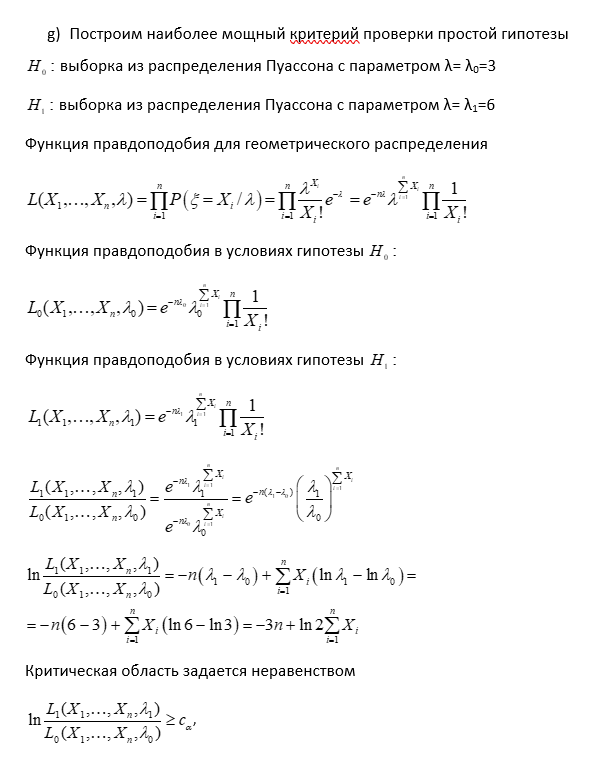
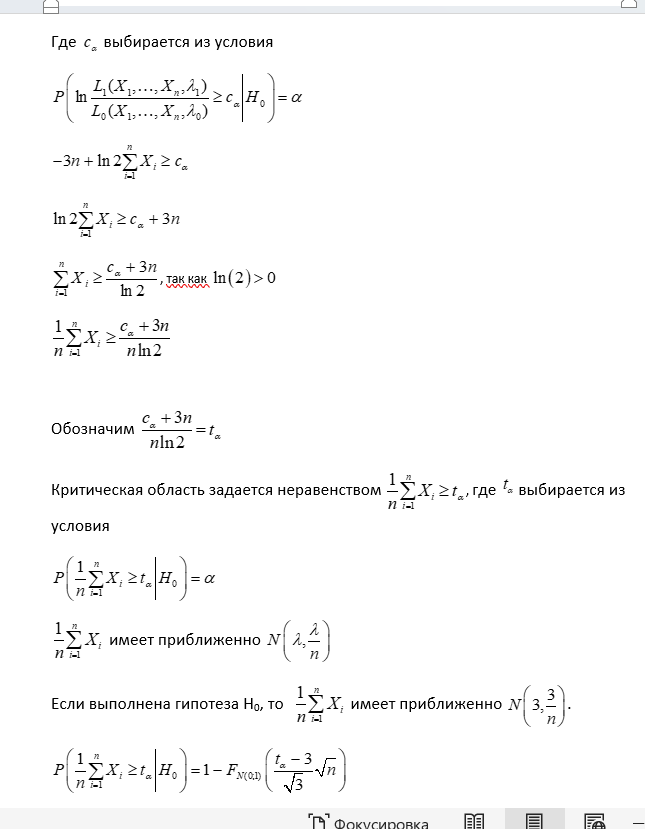
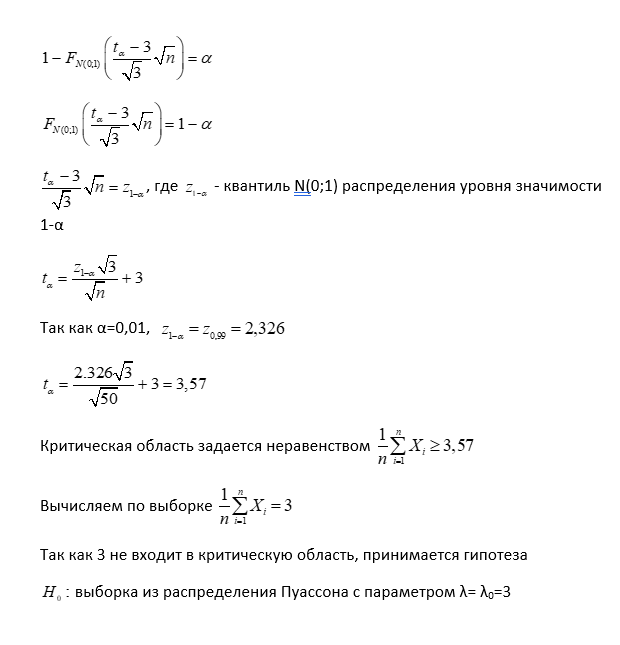
Поменяем местами основную и альтернативную гипотезы.
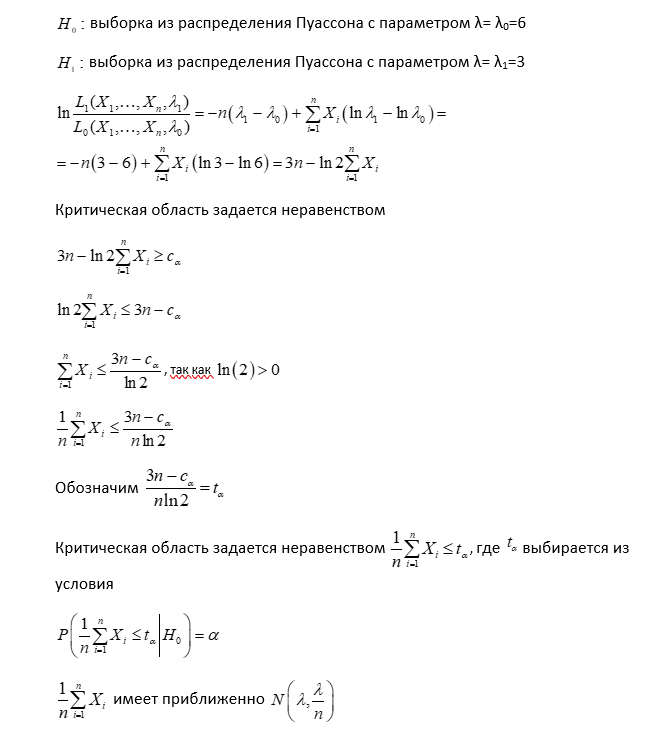
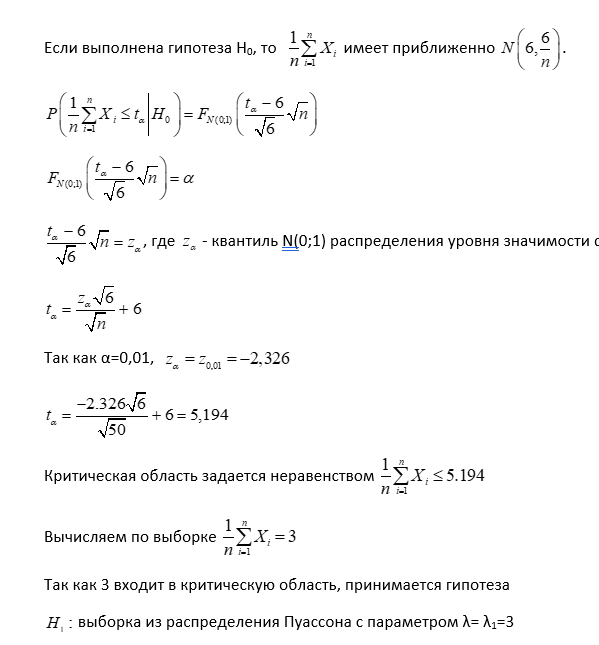

#### h) В пунктах c-d заменить семейство распределений Пуассона на семейство геометрических распределений: $\displaystyle P_\lambda(X=k) = \frac {\lambda^k} {(\lambda + 1)^{k+1}}, k= 0,1,...$.

#### h.c. Построим оценку максимального правдоподобия для λ. Функция правдоподобия выборки
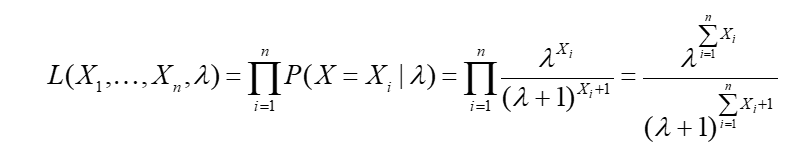
#### Логарифм функции правдоподобия
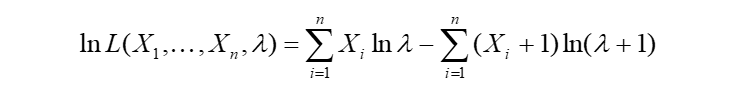

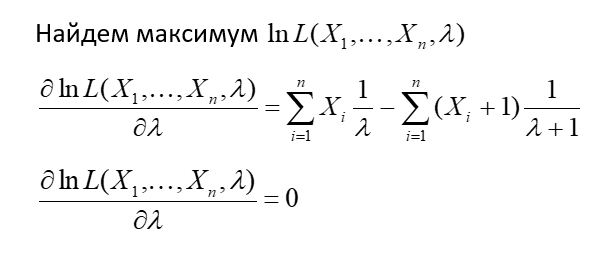
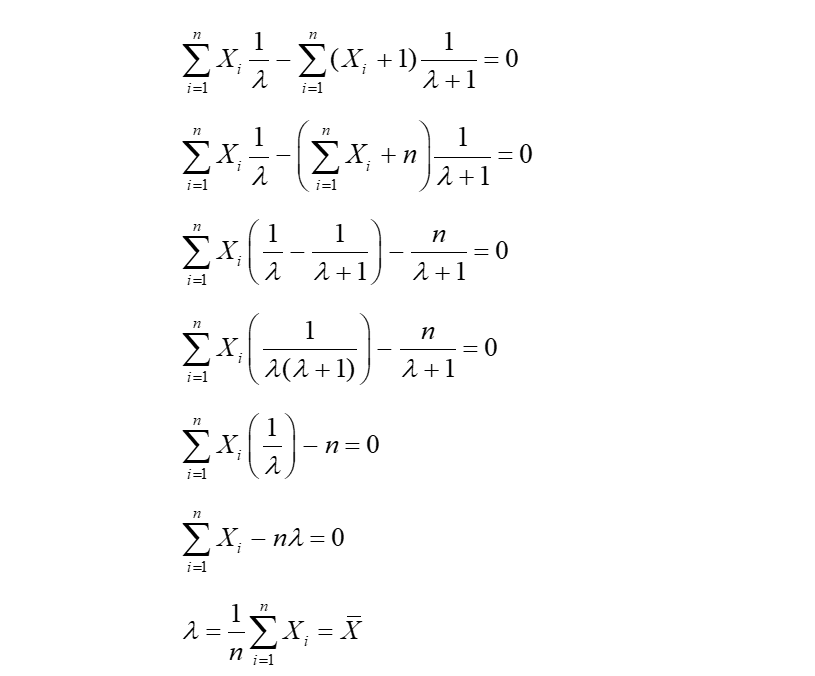 <br>
Оценка максимального правдоподобия параметра λ для геометрического распределения 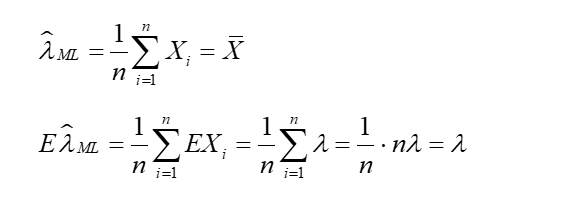
Так как полученная оценка несмещенная, смещение равно 0.
Построим оценку по методу моментов. Для этого приравняем выборочный момент первого порядка, т.е. выборочное среднее к математическому ожиданию для геометрического распределения, т.е. к  λ. Оценка совпала с оценкой максимального правдоподобия, поэтому она также несмещенная.
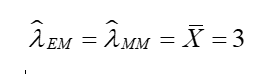



#### h.d) Построить ассимптотический доверительный интервал уровня значимости $\alpha_1 = 0.01$ для параметра $\lambda$ на базе оценки максимального правдоподобия.
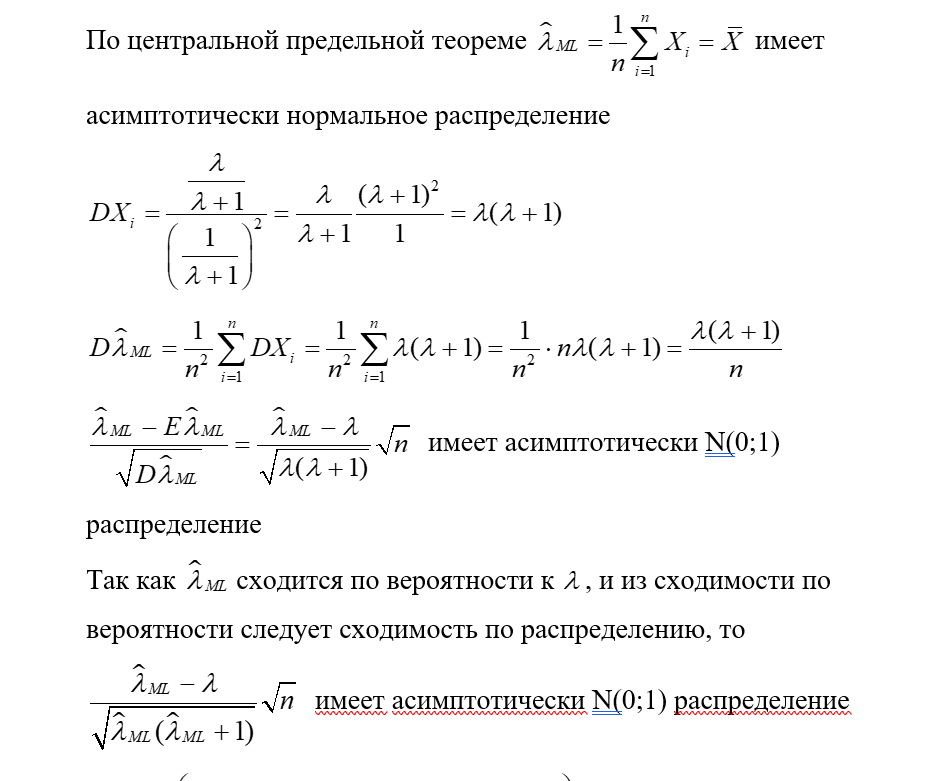
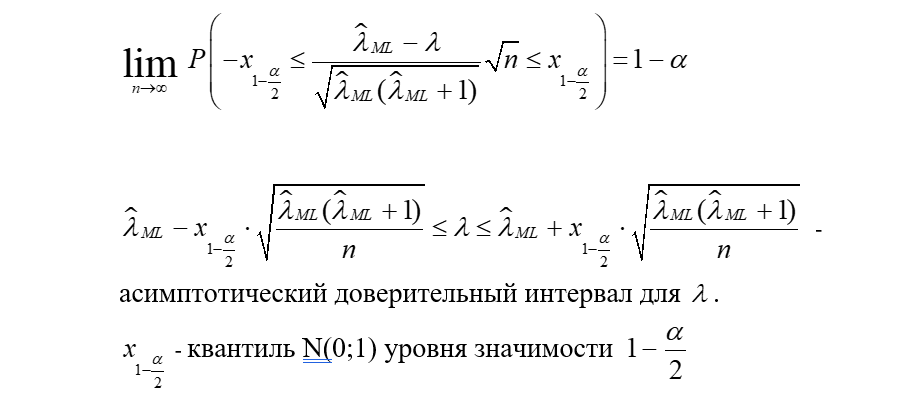<br>
Асимптотический доверительный интервал для λ
α1 =	0,01			
Квантиль N(0;1)	2,5758293		

####h.e) Используя гистограмму частот, построить критерий значимости $χ^2$ проверки простой гипотезы согласия с геометрическим распределением с параметром $λ_0$. Проверить гипотезу на уровне значимости $α_1$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергуть данную гипотезу.

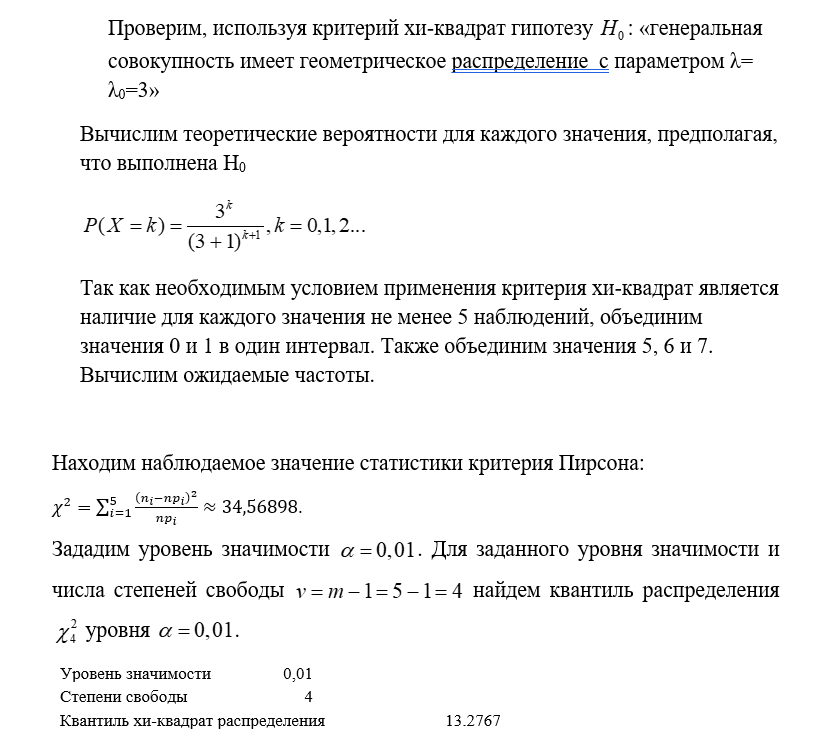

Критерий значимости $\chi^2$ оказался больше расчитанной квантили с уровнем значимости $\alpha_1$ $X_{\alpha_1}$. Поэтому нулевая гипотеза $H_0$ о согласии с $Geom(1/(1+\lambda_0))$ отвергается.


Criticality of significance: 34.56898
Qantile of order 0.99: 13.2767
Xsquad < Xalpha: FALSEQantile of order  0.9999997 : 35.89621
Comparing Xsquad < quantile: TRUE 
quantile - Xsquad =  1.327235

Max level of importance: 0.004321

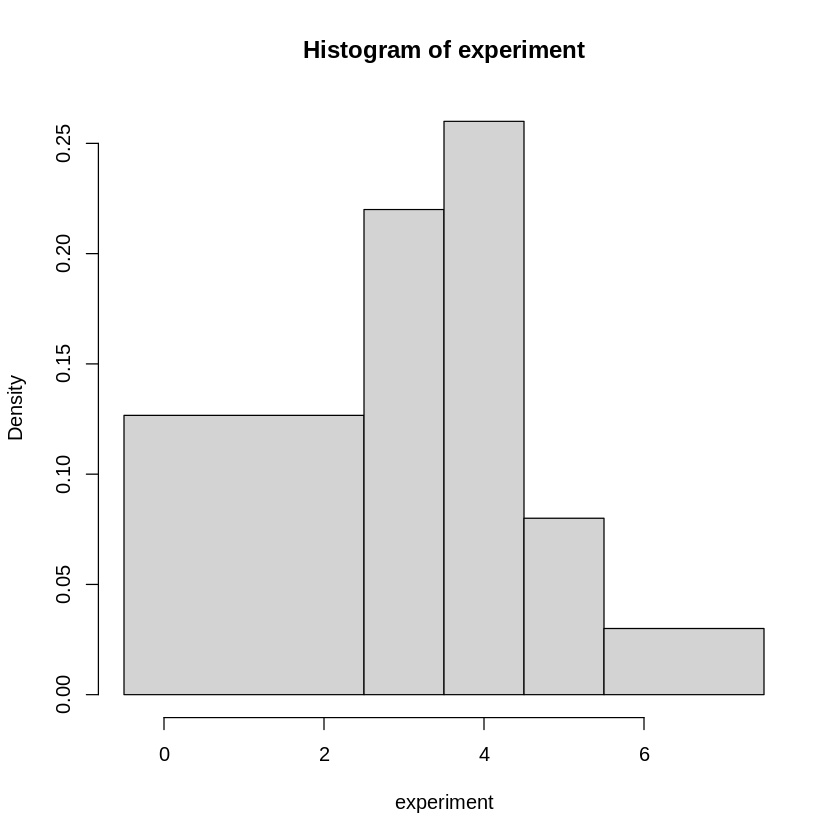

In [22]:
brk <- c(-0.5, 2.5, 3.5, 4.5, 5.5, 7.5)
h <- hist(experiment, breaks = brk)
nu <- h$counts
brk <- brk <- c(-Inf, 2.5, 3.5, 4.5, 5.5, Inf)
p0 <- pgeom(brk[2:6], 1/4) - pgeom(brk[1:5], 1/4)
X.2 <- sum ((nu - n*p0)^2 / (n*p0))
cat("\nCriticality of significance:", X.2)
X.alpha <- qchisq(1-0.01, df = length(brk)-2)
cat("\nQantile of order 0.99:", X.alpha)
cat("\nXsquad < Xalpha:", X.2 < X.alpha)
q <- qchisq(1 - 0.00000030395, df = length(brk)-2)
cat("\nQantile of order ", 1 - 0.00000030395, ":", q)
cat("\nComparing Xsquad < quantile:", X.2 < q, "\nquantile - Xsquad = ", q-X.2)
cat("\n\nMax importance level: 0.00000030395")

####h.f) Построить критерий значимости $χ^2$ проверки сложной гипотезы согласия с геометрическим распределением. Проверить гипотезу на уровне значимости $α_1$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

$\displaystyle \chi^2(\lambda) = \sum_{i=1}^r {\frac {(\nu_i - np_{0i}(\lambda))^2} {np_{0i}(\lambda)}}$ <br>

Критерий статистики $\tilde{\chi^2} = \underset{\lambda}{inf}\chi^2(\lambda)$

Если верна нулевая гипотеза, то $\tilde{\chi^2}$ имеет распределение $\chi_{r-d-1}^2, d$ - количество параметров распределения.

In [27]:
X.2.stat <- function(lambda) {
    p0 <- pgeom(brk[2:6], 1/(lambda+1)) - pgeom(brk[1:5], 1/(lambda+1))
    X.2 <- sum ((nu - n*p0)^2 / (n*p0))
    return(X.2)
}
X.2.min <- nlm(X.2.stat, mean(experiment))$minimum
cat("\n\nMinimal Xsquad:", X.2.min)
X.alpha <- qchisq(0.99, df = length(brk)-3)
cat("\nQantile of order 0.99:", X.alpha)
cat("\nComparing Xsquad < Xalpha:", X.2.min < X.alpha)



Minimal Xsquad: 34.14049
Qantile of order 0.99: 11.34487
Comparing Xsquad < Xalpha: FALSE

Критерий значимости $\chi^2$ оказался больше расчитанной квантили с уровнем значимости $\alpha_1$ $X_{\alpha_1}$. Поэтому нулевая гипотеза $H_0$ о согласии с $Geom(1/(1+\lambda_0))$ отвергается.

###2. Исходные данные:<br>
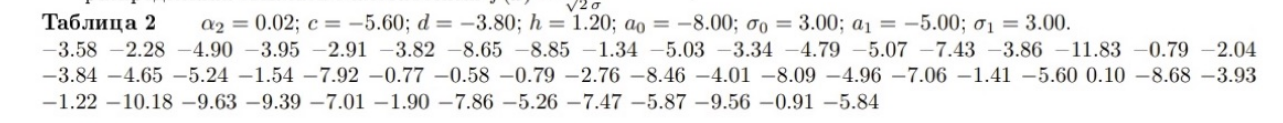

Преобразуем данные эксперимента в вектор.

In [5]:
experiment <- c( -3.58, -2.28, -4.90, -3.95, -2.91, -3.82, -8.65, -8.85, -1.34, -5.03, -3.34, -4.79, -5.07, -7.43, -3.86, -11.83, -0.79, -2.04,
-3.84, -4.65, -5.24, -1.54, -7.92, -0.77, -0.58, -0.79, -2.76, -8.46, -4.01, -8.09, -4.96, -7.06, -1.41, -5.60, 0.10, -8.68, -3.93,
-1.22, -10.18, -9.63, -9.39, -7.01, -1.90, -7.86, -5.26, -7.47, -5.87, -9.56, -0.91, -5.84)
experiment

[1]  -3.58  -2.28  -4.90  -3.95  -2.91  -3.82  -8.65  -8.85  -1.34  -5.03
[11]  -3.34  -4.79  -5.07  -7.43  -3.86 -11.83  -0.79  -2.04  -3.84  -4.65
[21]  -5.24  -1.54  -7.92  -0.77  -0.58  -0.79  -2.76  -8.46  -4.01  -8.09
[31]  -4.96  -7.06  -1.41  -5.60   0.10  -8.68  -3.93  -1.22 -10.18  -9.63
[41]  -9.39  -7.01  -1.90  -7.86  -5.26  -7.47  -5.87  -9.56  -0.91  -5.84

####a) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот

*Вариационный ряд* - набор порядковых статистик.<br>
Для этого отсортируем данные эксперимента *experiment*.<br><br>

In [6]:
experiment <- sort(experiment)
experiment

[1] -11.83 -10.18  -9.63  -9.56  -9.39  -8.85  -8.68  -8.65  -8.46  -8.09
[11]  -7.92  -7.86  -7.47  -7.43  -7.06  -7.01  -5.87  -5.84  -5.60  -5.26
[21]  -5.24  -5.07  -5.03  -4.96  -4.90  -4.79  -4.65  -4.01  -3.95  -3.93
[31]  -3.86  -3.84  -3.82  -3.58  -3.34  -2.91  -2.76  -2.28  -2.04  -1.90
[41]  -1.54  -1.41  -1.34  -1.22  -0.91  -0.79  -0.79  -0.77  -0.58   0.10


*Эмпирическая функция распределения*.
Воспользуемся функцей $ecdf$ для вычисления выборочной функции распределения, которую отрисуем с помощью функцией $plot$.<br>Формула:<br>
$\displaystyle F_n(x) = \frac {1} {n} \sum_{i=1}^n
\mathbb{1}_{\{x_i < x\}} = \frac {1} {n} \sum_{i=1}^n \mathbb{1}_{\{x_{(i)} < x\}},
\mathbb{1}_{A} =
\begin{cases}
    1  & \text{, если A выполнено}\\
    0  & \text{, иначе}
\end{cases}$<br><br>

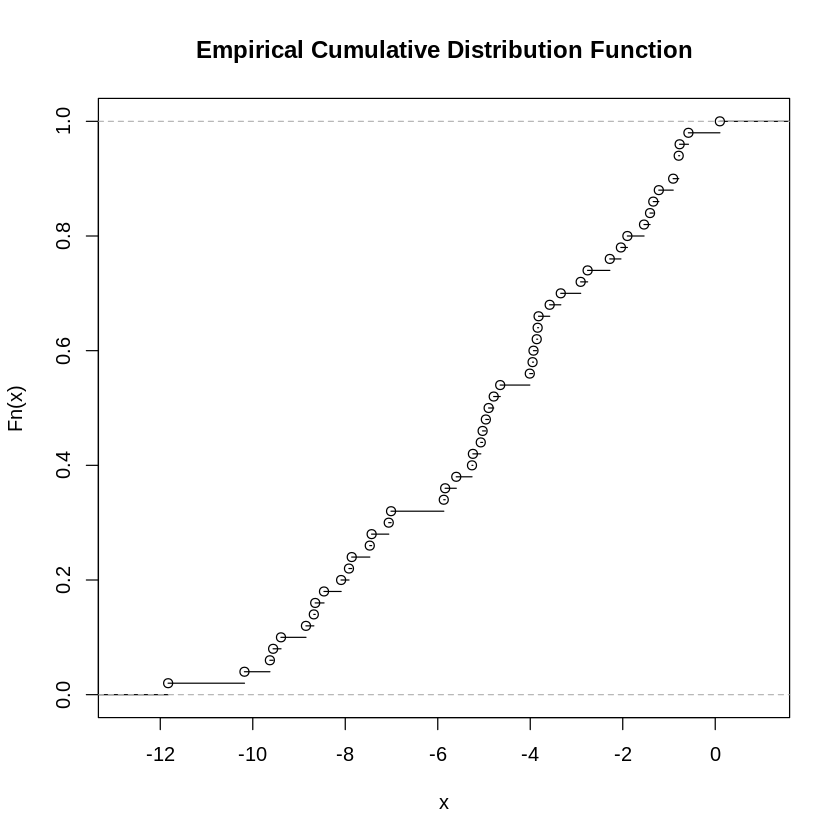

In [4]:
ECDF <- ecdf(experiment)
plot(ECDF, pch=1, main = "Empirical Cumulative Distribution Function")


*Частота* - отношение количества элементов в вариационном ряду равных заданному значению или принадлежащих заданному промежутку значений к общему количеству:<br>
$freq = \frac 1 n \sum_{i=1}^n \mathbb{1}_{\{x_{(i)} = x\}}\ или\ freq = \frac 1 n \sum_{i=1}^n \mathbb{1}_{\{x_{(i)} \in [a,b]\}}$ <br><br>
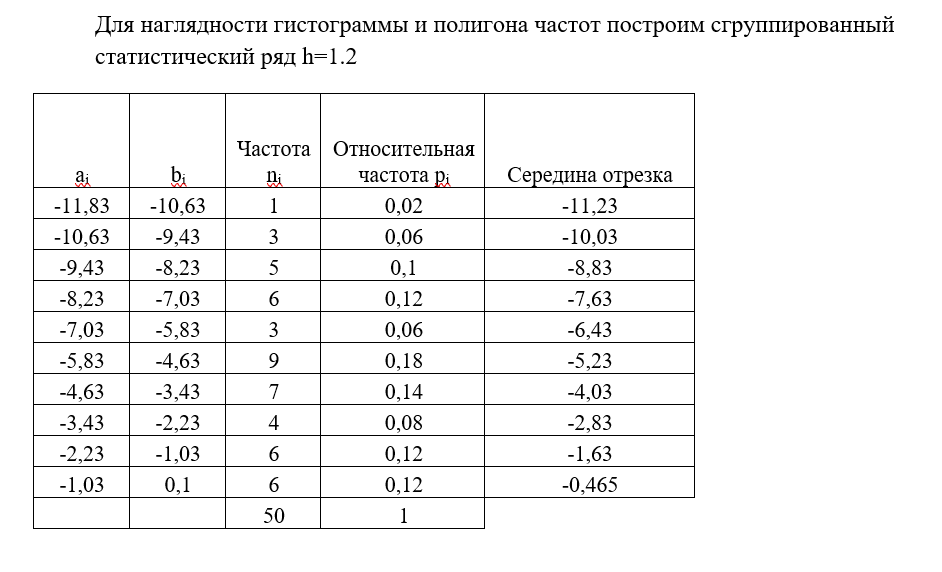

С помощью функции $hist$ выведем гистограмму частот.


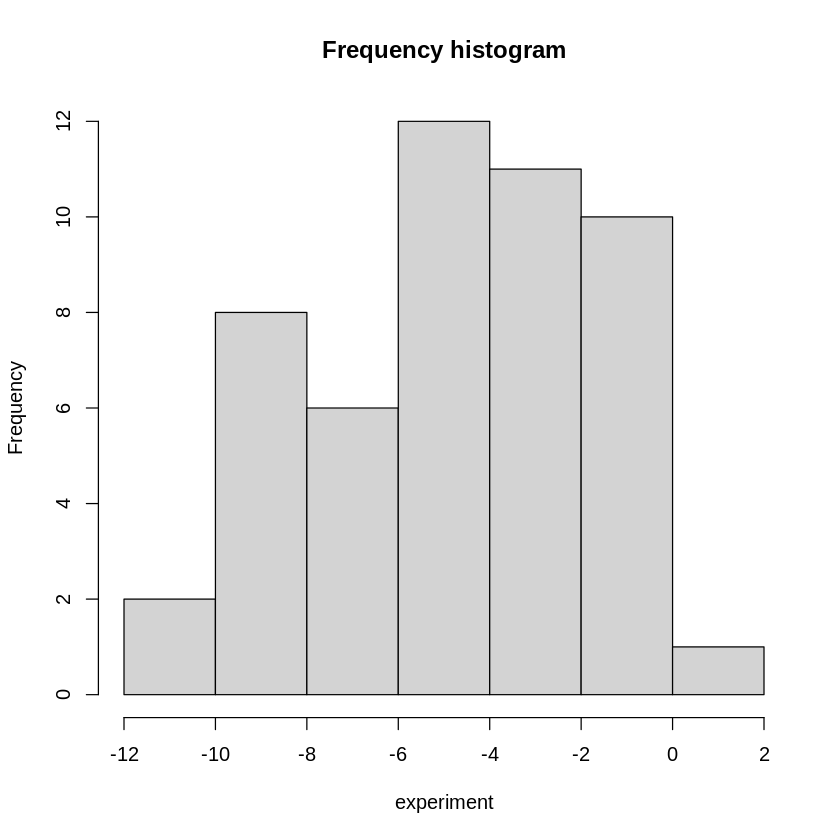

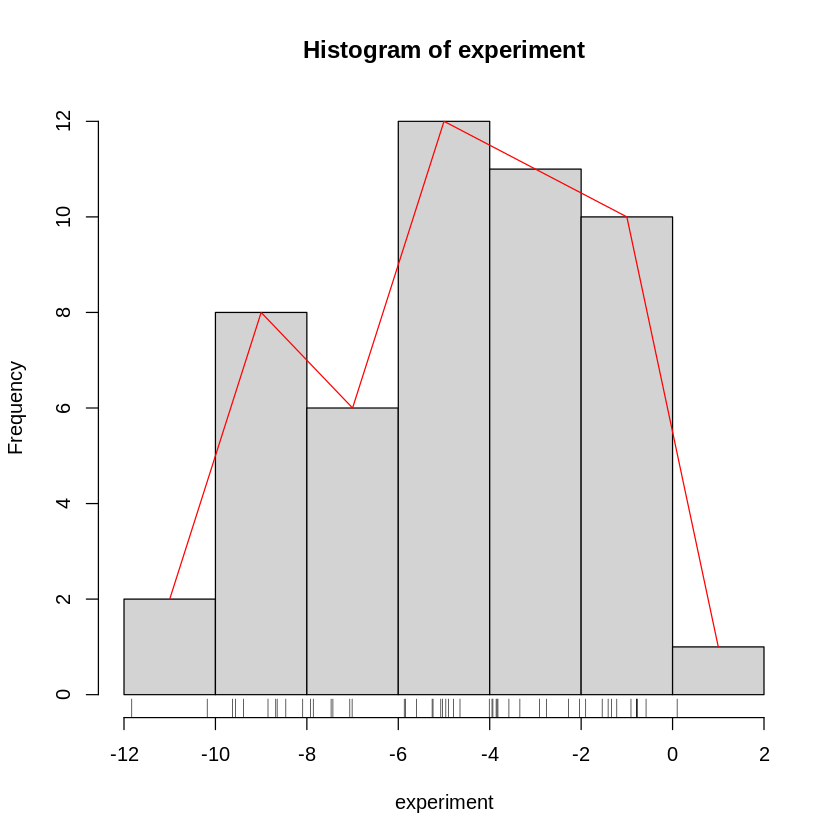

In [5]:
hist(experiment, main = "Frequency histogram")
h1 <- hist(experiment)
lines(h1$counts ~ h1$mids, col="red")
rug(experiment)

####b) Вычислить выборочные аналоги следующих числовых характеристик:

#####(i) Математическое ожидание.

*Выборочное среднее*: $\overline {X} = \frac {1} {n} \sum_{i=1}^n X_i = -4.935$<br>
Данные получаем с помощью встроенной функции $mean$.

In [7]:
n <- length(experiment)
sample_mean <- mean(experiment)
sample_mean

[1] -4.935

#####(ii) Дисперсия.

*Посчитаем выборочный центральный момент*: $S^2 = \frac {1} {n} \sum_{i=1}^n (X_i - \overline X)^2 = 9.049181$ <br>

In [8]:
dispersion <- sum((experiment - sample_mean)^2)/50
dispersion

[1] 9.049181

#####(iii) Медиана.

*Выборочная квантиль порядка $p$*:
$Z_p = 
\begin{cases}
    X_{(np)}  & np \in \mathbb{Z} \\
    X_{([np]+1)} & np \notin \mathbb{Z}
\end{cases}$<br>
*Выборочная медиана* - квантиль порядка $\frac 1 2$.<br><br>
Для подсчёта была использована функция $median$.

In [50]:
median <- median(experiment)
median

[1] -4.845

#####(iv) Асимметрия.

*Асимметрия*: $\displaystyle asymmetry = \frac {\mu_{3,n}} {\mu_{2,n}^{\frac 3 2}}$, где $\mu_{k,n}$ - $k$-ый (второй и третий) выборочные центральные моменты.<br>


In [51]:
mu.2 <- dispersion
mu.3 <- sum((experiment - sample_mean)^3)/50
asymmetry <- mu.3/(mu.2*sqrt(mu.2))
asymmetry

[1] -0.2440927

#####(v) Эксцесса.

*Эксцесса*: $\displaystyle excess\ kurtosis = \frac {\mu_{4,n}} {\mu_{2,n}^2} - 3$, где $\mu_{k,n}$ - $k$-ый (второй и четвёртый) выборочные центральные моменты.<br>
Данные, полученные при подсчёте напрямую (по формуле) и через функцию  $kurtosis$  совпадают с некоторой погрешностью.

In [52]:
mu.4 <- sum((experiment - sample_mean)^4)/50
excess <- mu.4 / (mu.2)^2 - 3
excess_pr <- kurtosis(experiment)
excess
excess_pr

ERROR: ignored

#####(vi) Вероятности $Pr(X \in [c,d]) = Pr(X \in [-5.60,-3.80])$.

$\displaystyle Pr(X \in [a,b]) = \sum_{i=a}^b Pr(X=i)$<br>
$\displaystyle Pr(x=i) = \frac 1 n \sum_{j=1}^n \mathbb{1}_{\{X_j = i\}}$.<br>
Значение вероятности было вычислено по соответсвующим формулам.

In [53]:
p <- sum(experiment >= -5.60 & experiment <= -3.80)
p <- p/50
p

[1] 0.3

#### c) В предположении, что исходные наблюдения являются выборкой из нормального распределения, построить оценку максимального правдоподобия (ОМП) параметров *a,σ^2*, и соответствующие оценки по методу моментов (ОММ). Найти смещение оценок.


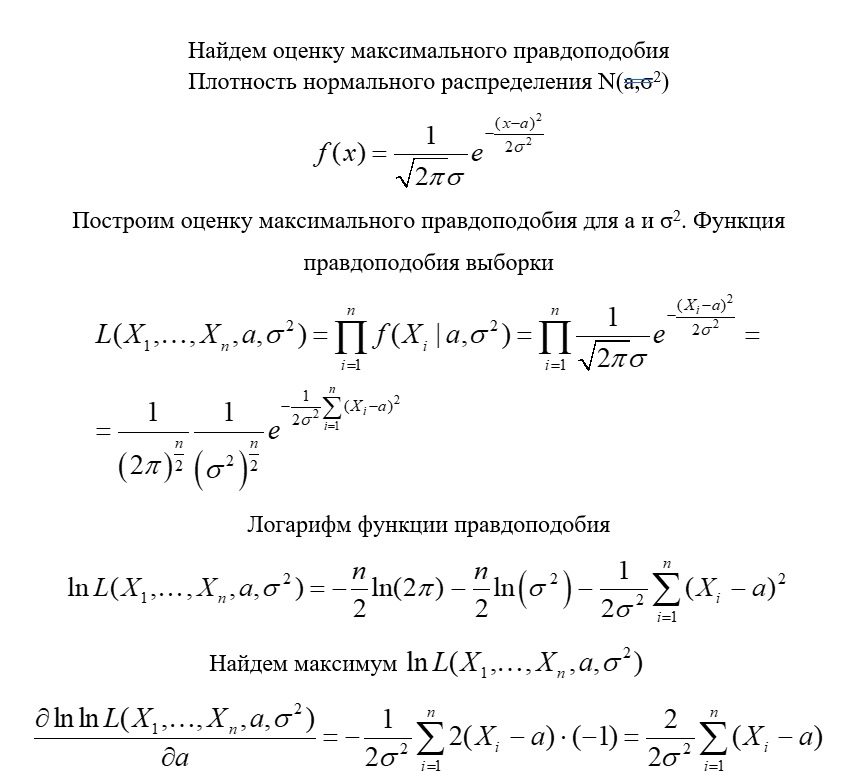
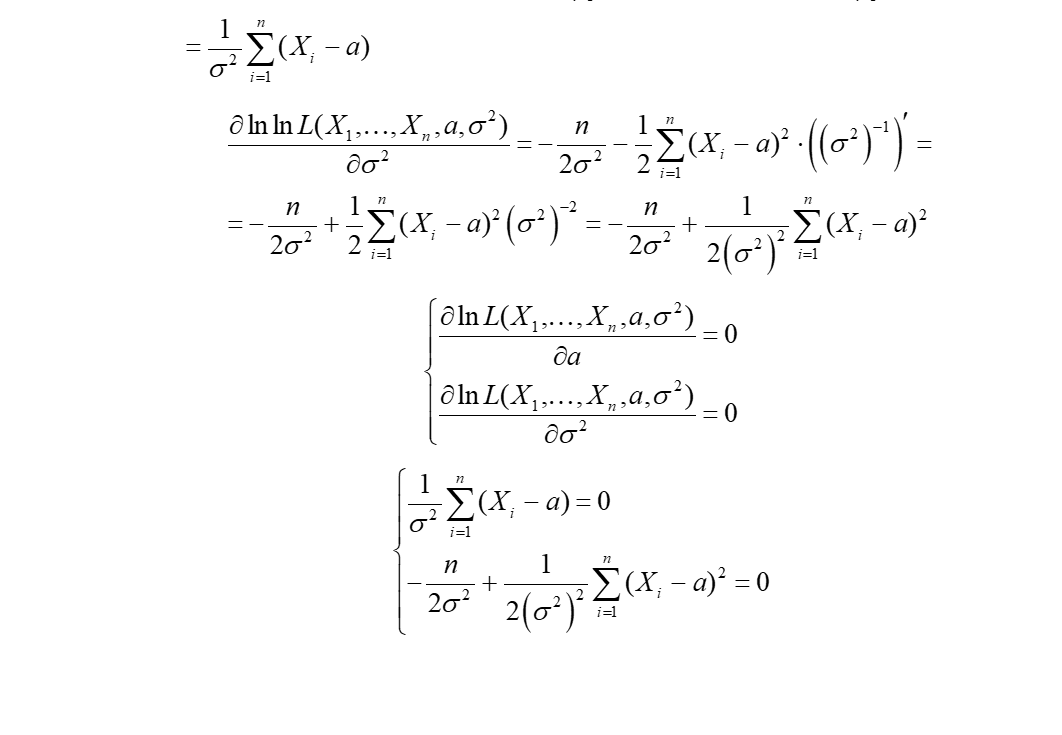
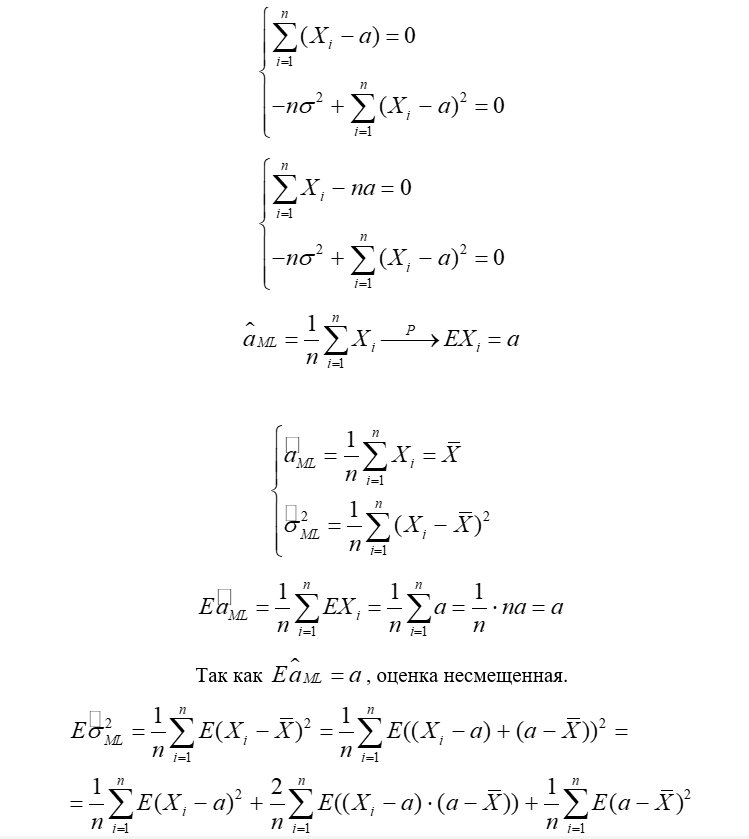
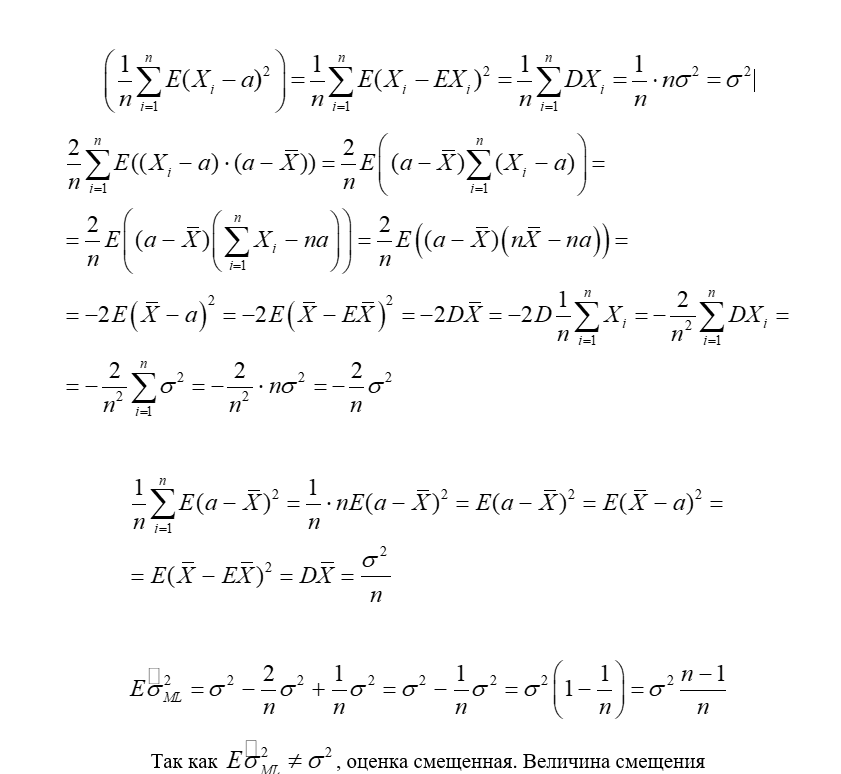
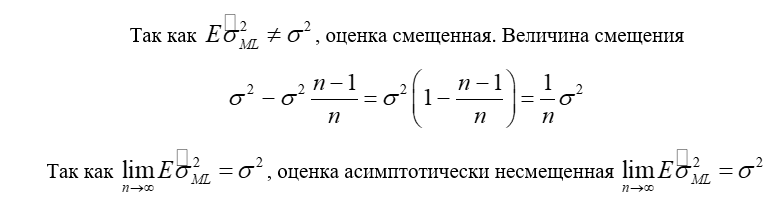

Построим оценку по методу моментов.  Для этого приравняем выборочный момент первого порядка, т.е. выборочное среднее к математическому ожиданию для нормального распределения, т.е. к a, а выборочный момент второго порядка, т.е. выборочную дисперсию  к теоретической дисперсии, т.е. к  . Получим
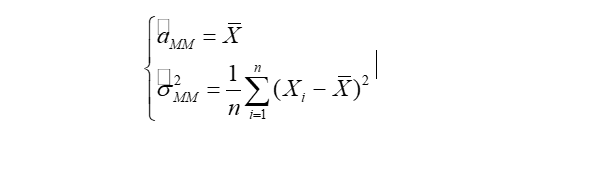

#### d. Построить доверительные интервалы уровня значимости для параметров (a,σ^2).

$\sqsupset X_1, X_2, ..., X_n - выборка\ из\ 𝒩 (a, \sigma^2).$<br>
$\displaystyle p_\theta (x) = \frac 1 {\sigma \sqrt {2 \pi}} exp \left (- \frac 1 {2\sigma} (X-a)^2 \right ).$<br>
Построим доверительный интервал для $a$ и $\sigma^2$.<br><br>

1. Доверительный интервал для $a$:<br>

Согласна лемме Фишера: $\displaystyle \sqrt {n-1} \frac {\overline X - a} {S} \sim S_{n-1}.$

$\displaystyle X_{\frac {\alpha_2} 2}: P(X < -X_{\frac {\alpha_2} 2}) = \frac {\alpha_2} 2.$<br>

$\displaystyle P_{\theta}(-X_{\frac {\alpha_2} 2} \le \sqrt {n-1} \frac {\overline X - a} {S} \le X_{\frac {\alpha_2} 2}) = 1-\alpha_2;\\ 
P_{\theta}(-X_{\frac {\alpha_2} 2} \frac S {\sqrt {n-1}} - \overline X \le - a \le X_{\frac {\alpha_2} 2} \frac S {\sqrt {n-1}} - \overline X) = 1-\alpha_2;\\
P_{\theta}( -X_{\frac {\alpha_2} 2} \frac S {\sqrt {n-1}} + \overline X \le a \le X_{\frac {\alpha_2} 2} \frac S {\sqrt {n-1}} + \overline X ) = 1-\alpha_2$.<br><br>

Ответ: $\displaystyle P_{\theta}( -X_{0.01} \frac S {\sqrt {n-1}} + \overline X \le a \le X_{0.01} \frac S {\sqrt {n-1}} + \overline X ) = 0.98.$<br><br>


2. Доверительный интервал для $\sigma^2$:<br>

Солгласно лемме Фишера: $\displaystyle \frac {nS^2} {\sigma^2} \sim χ_{n-1}^2.$<br>

Найдем две квантили: $\displaystyle X_{1\alpha_2}: P(X < X_{1\alpha_2}) = \frac {\alpha_2} 2;\ X_{2 \alpha_2}: P(X > X_{1\alpha_2}) = 1 - \frac {\alpha_2} 2$<br>

$\displaystyle P_{\theta}(X_{1\alpha_2} \le \frac {nS^2} {\sigma^2} \le X_{2\alpha_2}) = 1-\alpha_2;\\
P_{\theta}(\frac {nS^2} {X_{2\alpha_2}} \le \sigma^2 \le \frac {nS^2} {X_{1\alpha_2}}) = 1-\alpha_2.$<br>

Ответ: $\displaystyle P_{\theta}(\frac {nS^2} {X_{2\alpha_2}} \le \sigma^2 \le \frac {nS^2} {X_{1\alpha_2}}) = 0.98.$<br><br>
Найдем доверительные интервалы для каждого параметра.<br>

Для параметра $a$:
найдем значение квантили $X_{0.01}$ (с помощью функции $qt(alpha/2, n-1) $), составим доверительный интервал.<br>
Для параметра $\sigma$: 
найдем две квантили: $X_{1\alpha_2}$ и $X_{2\alpha_2}$ (с помощью функции $qchisq(alpha/2, n-1)$ и $qchisq(1 - alpha/2, n-1)$ соответственно), составим доверительный интервал.

In [9]:
quant.3 <- qt(.01, n - 1)
cat("Order quantile 0.01:", quant.3)
left <- sample_mean + quant.3 * sqrt(dispersion) / sqrt(n - 1)
right <- sample_mean - quant.3 * sqrt(dispersion) / sqrt(n - 1)
cat("\nConfidence interval");
cat("\nfor a: [",left, ";", right, "]")
quant.4.1 <- qchisq(.01, n - 1)
quant.4.2 <- qchisq(.99, n - 1)
left.border <- n * dispersion / quant.4.2
right.border <- n * dispersion / quant.4.1
cat("\nfor sigma^2: [",left.border, ";", right.border, "]")

Order quantile 0.01: -2.404892
Confidence interval
for a: [ -5.96848 ; -3.90152 ]
for sigma^2: [ 6.039272 ; 15.63403 ]

####e) С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с нормальным распределением с параметрами $(a_0, \sigma_0^2)$. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором нет оснований отвергнуть данную гипотезу. 

Пусть

$H_0: F \equiv F_0 - ф.р. 𝒩(a_0, \sigma_0^2)$<br>
$H_A: F \not{\equiv} F_0$

Статистика критерия: $KS=\sqrt n \underset{X}{sup} |F_n(X)-F_0(X)|,$ где $F_n$ - эмпирическая ф.р.

Если нулевая гипотеза верна, то $KS$ имеет распределения Колмогорова ($𝒦$).

Значение уровня значимости: $1-𝒦(KS)$, где $𝒦$ - ф. р. Колмогорова.
Соответственно, критерий принятия гипотезы есть: $1-𝒦(KS) \geq \alpha_1$

Решение о верности гипотезы принимается благодаря функции $ks.text$:

$ks.test$ возвращает статистику $D$ и $p-value$, соответствующее статистике $D$. Статистика $D$ представляет собой абсолютное максимальное расстояние (верхний предел) между $CDF$ двух выборок. Чем ближе это число к 0, тем больше вероятность того, что две выборки были взяты из одного и того же распределения.

$p-value$, возвращаемое $ks.test$: мы отвергаем нулевую гипотезу о том, что две выборки были взяты из одного и того же распределения, если $p-value$ меньше уровня значимости.


-11.83 -10.18 -9.63 -9.56 -9.39 -8.85 -8.68 -8.65 -8.46 -8.09 -7.92 -7.86 -7.47 -7.43 -7.06 -7.01 -5.87 -5.84 -5.6 -5.26 -5.24 -5.07 -5.03 -4.96 -4.9 -4.79 -4.65 -4.01 -3.95 -3.93 -3.86 -3.84 -3.82 -3.58 -3.34 -2.91 -2.76 -2.28 -2.04 -1.9 -1.54 -1.41 -1.34 -1.22 -0.91 -0.79 -0.79 -0.77 -0.58 0.1
Criticality of significance (manually calculated): 0.7851055
Criticality of significance (got from ks.test: statistic D): 0.8 
p-value: 3.330669e-15 
Compare p-value >= 0.02: FALSE

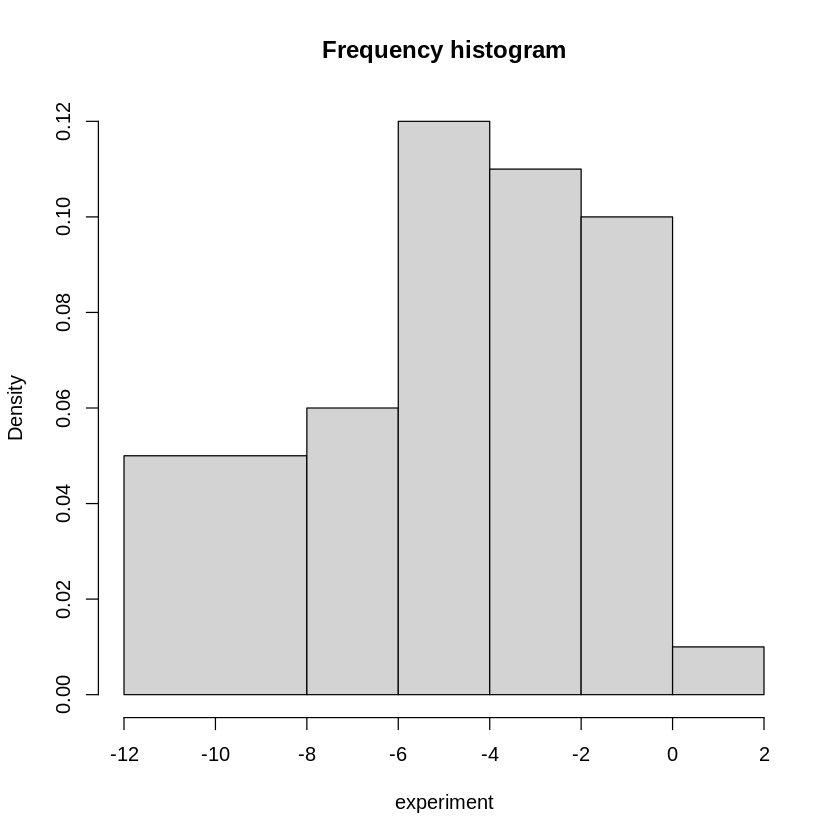

In [16]:
cat(experiment)
Fn <- ecdf(experiment)
brk <- c(-12, -8, -6, -4, -2, 0, 2)
h <- hist(experiment, main = "Frequency histogram", breaks = brk)
nu <- h$counts
experiment_1 <- experiment[1:(n-1)]
experiment_i <- experiment[2:n]
max <- max(abs(Fn(experiment_1) - pnorm(experiment_1, 2, 3)))
max2 <- max(abs(Fn(experiment_i) - pnorm(experiment_i, 2, 3)))
criterion <- max(max, max2)
cat("\nCriticality of significance (manually calculated):", criterion)
R_criterion <- ks.test(Fn(experiment), pnorm(experiment, 2, 3))
cat("\nCriticality of significance (got from ks.test: statistic D):", R_criterion$statistic, 
"\np-value:", R_criterion$p.value, "\nCompare p-value >= 0.02:", R_criterion$p.value >= 0.02)

Так как $p-value$ оказалось меньше уровня значимости,  мы отвергаем $H_0$ гипотезу.

####f) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением нормальным с параметрами $(a_0, \sigma_0^2)$. Проверить гипотезу на уровне значимости $α_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергуть данную гипотезу.

Выдвинем гипотезы: <br>
$H_0: F \equiv F_0(a_0, \sigma_0^2) - ф.р. 𝒩(a_0, \sigma_0^2)$<br>
$H_A: F \not{\equiv}\ F_0(a_0, \sigma_0^2)$

Критерий значимости
$\displaystyle \chi^2 = \sum_{i=1}^r {\frac {(\nu_i - np_{0i})^2} {np_{0i}}}$ <br>
$\nu_i$ - количество наблюдений в интервале $i$; $n$ - размер выборки; $r$ - количество интервалов на гистограмме частот.<br>
$p_{0i} = P(\xi \in I_i) = P_0(I_i) = F_0(a_i) - F_0(a_{i-1}),\ I_i$ - интервал на гистограмме частот, $a_i$ и $a_{i-1}$ - границы $i$-го интервала.

Если верна нулевая гипотеза $H_0$, то $\chi^2$ имеет распределение $\chi_{r-1}^2$ - хи-квадрат, иначе, хи-квадрат с параметром (смещенный хи-квадрат) $\chi_{r-1}^2(\mu)$.

-11.83 -10.18 -9.63 -9.56 -9.39 -8.85 -8.68 -8.65 -8.46 -8.09 -7.92 -7.86 -7.47 -7.43 -7.06 -7.01 -5.87 -5.84 -5.6 -5.26 -5.24 -5.07 -5.03 -4.96 -4.9 -4.79 -4.65 -4.01 -3.95 -3.93 -3.86 -3.84 -3.82 -3.58 -3.34 -2.91 -2.76 -2.28 -2.04 -1.9 -1.54 -1.41 -1.34 -1.22 -0.91 -0.79 -0.79 -0.77 -0.58 0.1
Criticality of significance: 5023.029
Qantile of order 0.99: 13.38822
Comparing Xsquad < Xalpha: FALSE

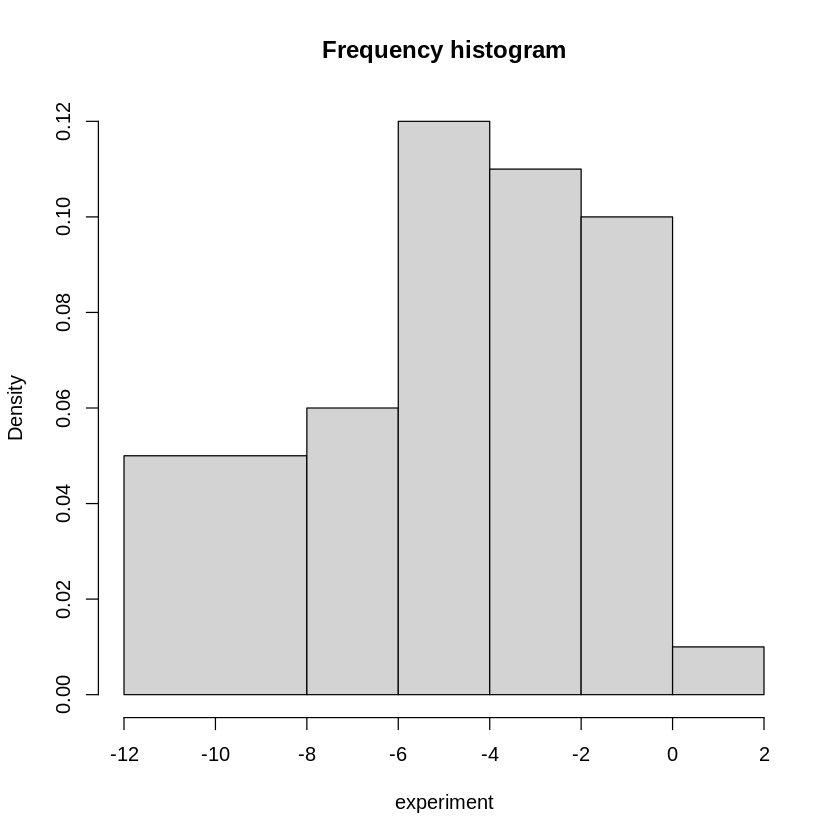

In [17]:
cat(experiment)
brk <- c(-12, -8, -6, -4, -2, 0, 2)
h <- hist(experiment, main = "Frequency histogram", breaks = brk)
nu <- h$counts
brk <- brk <- c(-Inf, -8, -6, -4, -2, 0, Inf)
p0 <- pnorm(brk[2:7], 2, 3) - pnorm(brk[1:6], 2, 3)
X.2 <- sum ((nu - n*p0)^2 / (n*p0))
cat("\nCriticality of significance:", X.2)
X.alpha <- qchisq(1-0.02, df = length(brk)-2)
cat("\nQantile of order 0.99:", X.alpha)
cat("\nComparing Xsquad < Xalpha:", X.2 < X.alpha)

####g) Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с нормальным распределением. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу

$H_0: F \in ζ$ - семейство нормальных распределений.

$\displaystyle \chi^2(a, \sigma) = \sum_{i=1}^r {\frac {(\nu_i - np_{0i}(a, \sigma))^2} {np_{0i}(a, \sigma)}}$ <br>

Критерий статистики $\tilde{\chi^2} = \underset{(a, \sigma)}{inf}\chi^2(a, \sigma)$

Если верна нулевая гипотеза, то $\tilde{\chi^2}$ имеет распределение $\chi_{r-d-1}^2, d$ - количество параметров распределения (2).

In [19]:
X.2.stat <- function(a, sigma) {
    p0 <- pnorm(brk[2:7], a, sigma) - pnorm(brk[1:6], a, sigma)
    X.2 <- sum ((nu - n*p0)^2 / (n*p0))
    return(X.2)
}
X.2.min <- nlm(X.2.stat, sample_mean, sqrt(dispersion))$minimum
cat("\n\nMinimal Xsquad:", X.2.min)
X.alpha <- qchisq(1-0.02, df = length(brk)-2)
cat("\nQantile of order 0.99:", X.alpha)
cat("\nComparing Xsquad < Xalpha:", X.2.min < X.alpha)



Minimal Xsquad: 6.531257
Qantile of order 0.99: 13.38822
Comparing Xsquad < Xalpha: TRUE